In [1]:
# import the relevant packages

from requests import get
from json import dumps
import numpy as np
import pandas as pd

In [2]:
# function to get JSON information from API

def get_data(api_params):
    
    ENDPOINT = "https://api.coronavirus.data.gov.uk/v1/data"

    response = get(ENDPOINT, params=api_params, timeout=10)

    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()

In [10]:
# define out parameters for the API call

AREA_TYPE = "nation"
AREA_NAME = "scotland"

filters = [
    f"areaType={ AREA_TYPE }",
    f"areaName={ AREA_NAME }"
]

structure = {
    "date": "date",
    "name": "areaName",
    "newCases": "newCasesByPublishDate",
    "newAdmissions": "newAdmissions",
    "newDeaths": "newDeaths28DaysByDeathDate",
    "P1Tests": "newPillarOneTestsByPublishDate", # NHS (and PHE in England)
    "P2Tests": "newPillarTwoTestsByPublishDate", # Commercial Partners
    "P3Tests": "newPillarThreeTestsByPublishDate", # Antibody
    "P4Tests": "newPillarFourTestsByPublishDate",   # Surveillance
}


api_params = {
    "filters": str.join(";", filters),
    "structure": dumps(structure, separators=(",", ":"))
}

SyntaxError: invalid syntax (<ipython-input-10-792eeb26ad12>, line 19)

In [8]:
# pull in json formatted covid data from the API
json = get_data(api_params)
df = pd.DataFrame(json["data"])

In [9]:
# extract the desired data

df.sort_values(by='date',ascending=True,inplace=True)
df.set_index(keys='date', inplace=True)

df.tail(20)

,name,newCases,newAdmissions,newDeaths,P1Tests,P2Tests
date,,,,,,
2020-08-13,Scotland,47,1.0,0.0,newPillarOneTestsByPublishDate,7530.0
2020-08-14,Scotland,65,2.0,0.0,newPillarOneTestsByPublishDate,9504.0
2020-08-15,Scotland,51,4.0,0.0,newPillarOneTestsByPublishDate,10578.0
2020-08-16,Scotland,43,1.0,0.0,newPillarOneTestsByPublishDate,7516.0
2020-08-17,Scotland,26,1.0,0.0,newPillarOneTestsByPublishDate,7344.0
2020-08-18,Scotland,49,1.0,0.0,newPillarOneTestsByPublishDate,7493.0
2020-08-19,Scotland,50,2.0,0.0,newPillarOneTestsByPublishDate,5262.0
2020-08-20,Scotland,77,NaN,0.0,newPillarOneTestsByPublishDate,12116.0
2020-08-21,Scotland,71,NaN,0.0,newPillarOneTestsByPublishDate,10275.0


In [11]:
# add in new columns

for i in range(0,englandPd.shape[0]-6):
    sevenDayCases = 0
    sevenDayAdmissions = 0
    sevenDayDeaths = 0
    sevenDayTests = 0

    for j in range(0,6):
        sevenDayCases += englandPd.iloc[i+j,1]
        sevenDayAdmissions += englandPd.iloc[i+j,2]
        sevenDayDeaths += englandPd.iloc[i+j,3]
        sevenDayTests += englandPd.iloc[i+j,4]

    englandPd.loc[englandPd.index[i+6],'sevenDayMACases'] = np.round( (sevenDayCases / 7) ,1)
    englandPd.loc[englandPd.index[i+6],'sevenDayMAAdmissions'] = np.round( (sevenDayAdmissions / 7) ,1)
    englandPd.loc[englandPd.index[i+6],'sevenDayMADeaths'] = np.round( (sevenDayDeaths / 7) ,1)
    englandPd.loc[englandPd.index[i+6],'sevenDayMATests'] = np.round( (sevenDayTests / 7) ,1)

englandPd["pctAdmissionsPerCase"] = 100.0 * englandPd["sevenDayMAAdmissions"] / englandPd["sevenDayMACases"] 
englandPd["pctDeathsPerCase"] = 100.0 * englandPd["sevenDayMADeaths"] / englandPd["sevenDayMACases"] 
englandPd["pctCasesPerTest"] = 100.0 * englandPd["sevenDayMACases"] / englandPd["sevenDayMATests"]

englandPd = englandPd.replace([np.inf, -np.inf], np.nan)

englandPd.tail()

,name,newCases,newAdmissions,newDeaths,P2Tests,sevenDayMACases,sevenDayMAAdmissions,sevenDayMADeaths,sevenDayMATests,pctAdmissionsPerCase,pctDeathsPerCase,pctCasesPerTest
date,,,,,,,,,,,,
2020-08-22,England,1060,25.0,4.0,NaN,744.4,41.9,4.9,NaN,5.628694,0.658248,NaN
2020-08-23,England,938,44.0,10.0,NaN,759.9,39.9,5.0,NaN,5.250691,0.657981,NaN
2020-08-24,England,758,41.0,5.0,NaN,803.3,39.6,4.9,NaN,4.929665,0.609984,NaN
2020-08-25,England,1065,NaN,7.0,NaN,772.3,37.4,4.4,NaN,4.842678,0.569727,NaN
2020-08-26,England,875,NaN,NaN,NaN,823.4,NaN,5.3,NaN,NaN,0.643673,NaN


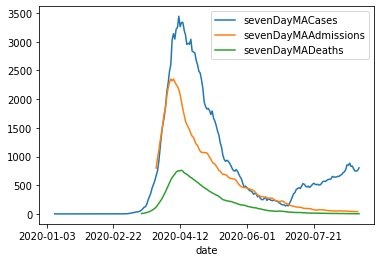

In [8]:
englandPd.plot(kind='line', y=['sevenDayMACases','sevenDayMAAdmissions','sevenDayMADeaths'])

In [24]:
ind = englandPd.fillna(value=0).P2Tests.searchsorted(value=0,side='right')
englandPd.iloc[ind]

name                    England
newCases                    372
newAdmissions               122
newDeaths                    20
P2Tests                   30479
sevenDayMACases           517.3
sevenDayMAAdmissions       98.1
sevenDayMADeaths           19.4
sevenDayMATests             NaN
pctAdmissionsPerCase    18.9639
pctDeathsPerCase        3.75024
pctCasesPerTest             NaN
Name: 2020-07-14, dtype: object

In [26]:
minDate = '2020-07-14'
maxDate = '2020-12-31'

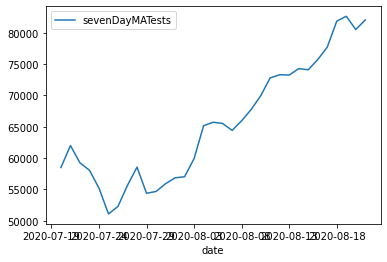

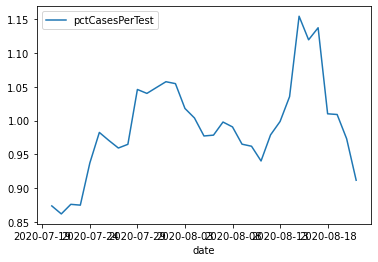

In [27]:
englandPd.loc[minDate : maxDate].plot(kind='line', y=['sevenDayMATests'])
englandPd.loc[minDate : maxDate].plot(kind='line', y=['pctCasesPerTest'])

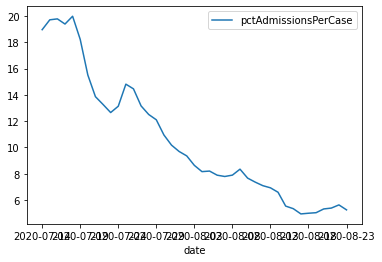

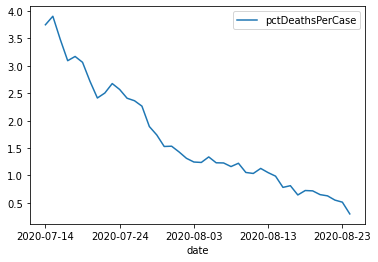

In [28]:
englandPd.loc[minDate : maxDate].plot(kind='line', y=['pctAdmissionsPerCase'])
englandPd.loc[minDate : maxDate].plot(kind='line', y=['pctDeathsPerCase'])